In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow import keras


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
%ls

__notebook__.ipynb


In [3]:
train_path = "../input/fashionmnist/fashion-mnist_train.csv"
test_path = "../input/fashionmnist/fashion-mnist_test.csv"

In [4]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [5]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
n_labels = train_df['label'].nunique()
print(f"nr labels: {n_labels}")
n_pixels = train_df.shape[1]
print(f"nr pixels: {n_pixels}")

nr labels: 10
nr pixels: 785


In [8]:
# Split into training and validation
train_size = 55000
y = train_df.pop("label").values
X = train_df.values.astype(np.float32)/255
X = X.reshape(60000, 28, 28, 1)
X_train, y_train = X[:train_size, :, :, :], y[:train_size]
X_val, y_val = X[train_size:, :, :, :], y[train_size:]
# Testing
y_test = test_df.pop('label').values
X_test = test_df.values.astype(np.float32)/255
X_test = X_test.reshape(10000, 28, 28, 1)
# Print
print(f"Train dataset size: {X_train.shape}")
print(f"Validation dataset size: {X_val.shape}")
print(f"Test dataset size: {X_test.shape}")

Train dataset size: (55000, 28, 28, 1)
Validation dataset size: (5000, 28, 28, 1)
Test dataset size: (10000, 28, 28, 1)


In [9]:
labels = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

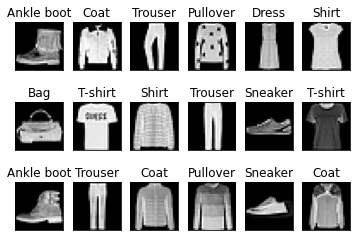

In [10]:
rows = 3
columns = 6
fig, axs = plt.subplots(rows, columns)
plt.subplots_adjust(hspace=0.4)
for i in range(rows):
    for j in range(columns):
        idx = np.random.randint(0, high=train_size-1)
        axs[i, j].imshow(X_train[idx].reshape(28, 28), cmap='gray')
        axs[i, j].set_title(f"{labels[y_train[idx]]}")
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

In [11]:
activation = "relu"
padding = "same"
dropout = 0.5

model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation=activation, padding=padding, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation=activation, padding=padding),
    keras.layers.Conv2D(128, 3, activation=activation, padding=padding),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation=activation, padding=padding),
    keras.layers.Conv2D(256, 3, activation=activation, padding=padding),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=activation),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(64, activation=activation),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(10, activation="softmax")
])

2022-10-06 09:28:12.905366: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         5

In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("/kaggle/working/sequntial_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)

In [14]:
history = model.fit(X, y, validation_data=(X_val, y_val), epochs=20, callbacks=[checkpoint_cb, early_stopping_cb])

2022-10-06 09:28:13.647462: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1875/1875 [==============================] - 352s 187ms/step - loss: 0.7443 - accuracy: 0.7313 - val_loss: 0.3726 - val_accuracy: 0.8674
Epoch 2/20
1875/1875 [==============================] - 348s 185ms/step - loss: 0.4217 - accuracy: 0.8556 - val_loss: 0.3207 - val_accuracy: 0.8848
Epoch 3/20
1875/1875 [==============================] - 351s 187ms/step - loss: 0.3605 - accuracy: 0.8755 - val_loss: 0.2711 - val_accuracy: 0.8994
Epoch 4/20
1875/1875 [==============================] - 356s 190ms/step - loss: 0.3266 - accuracy: 0.8900 - val_loss: 0.2592 - val_accuracy: 0.9054
Epoch 5/20
1875/1875 [==============================] - 355s 190ms/step - loss: 0.3019 - accuracy: 0.8972 - val_loss: 0.2528 - val_accuracy: 0.9068
Epoch 6/20
1875/1875 [==============================] - 358s 191ms/step - loss: 0.2837 - accuracy: 0.9042 - val_loss: 0.2108 - val_accuracy: 0.9224
Epoch 7/20
1875/1875 [==============================] - 358s 191ms/step - loss: 0.2630 - accuracy: 0.9098 - val_

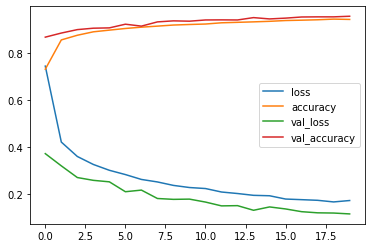

In [15]:
pd.DataFrame(history.history).plot()
plt.show()

In [16]:
model.save('/kaggle/working/manual_save_model.h5')

In [17]:
model = keras.models.load_model("/kaggle/working/sequntial_model.h5")

In [18]:
X_test.shape

(10000, 28, 28, 1)

In [19]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred

array([0, 1, 2, ..., 8, 8, 1])

In [20]:
accuracy = sum(y_pred==y_test)/y_pred.size
accuracy

0.9183